In [2]:
%pip install aspose-imaging-python-net

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import aspose.pycore as aspycore
from aspose.imaging import Image
from aspose.imaging.fileformats.bmp import BmpImage
from aspose.imaging.fileformats.tiff.enums import TiffExpectedFormat
import os
import torch

In [3]:
dataset = torch.load('/home/jupyter/datasphere/s3/s3-sirius/sirius_2024_participants/twwist/graph_with_cv_full_and_images/graph_with_cv_full_and_images_777.pickle')
dataset

Data(edge_index=[2, 47736], y=[11557], zone_id=[11557], train_mask=[11557], val_mask=[11557], test_mask=[11557], train_val_mask=[11557], train_fold_0=[11557], val_fold_0=[11557], train_fold_1=[11557], val_fold_1=[11557], train_fold_2=[11557], val_fold_2=[11557], train_fold_3=[11557], val_fold_3=[11557], train_fold_4=[11557], val_fold_4=[11557], x=[11557, 782], imgs=[11557, 12, 52, 52])

In [198]:
dataset.zone_id

tensor([78945044, 78945045, 78966929,  ..., 83366044, 83366045, 83366046])

In [6]:
dataset.imgs[0].shape

torch.Size([12, 52, 52])

In [21]:
len(dataset.imgs)

11557

In [50]:
52 * 52

2704

In [7]:
import matplotlib.pyplot as plt

In [65]:
a = []
for i in dataset.imgs:
    a.append(i)

In [67]:
len(a)

11557

In [62]:
d = {}


In [71]:
for i in range(len(a)):
    for j in range(len(dataset.imgs[i])):
        if i == 0:
            d[j] = [len(torch.nonzero(a[i]))]
        else:
            d[j].append((len(torch.nonzero(a[i]))))

In [72]:
d

{0: [2384,
  2383,
  2452,
  2389,
  2326,
  2050,
  2193,
  2507,
  2459,
  2099,
  2522,
  1782,
  1973,
  831,
  1312,
  2188,
  1914,
  1634,
  342,
  961,
  623,
  2093,
  1187,
  2144,
  1345,
  2036,
  675,
  2162,
  1137,
  562,
  689,
  980,
  1178,
  2182,
  2531,
  2653,
  2554,
  1326,
  1971,
  905,
  1245,
  811,
  2388,
  1866,
  2524,
  1895,
  1654,
  1871,
  2039,
  1379,
  2605,
  2655,
  2469,
  2088,
  2449,
  1857,
  2322,
  736,
  2414,
  2304,
  1923,
  2523,
  2562,
  2402,
  2539,
  2612,
  2477,
  2615,
  2579,
  2565,
  1163,
  1099,
  2801,
  2182,
  630,
  1545,
  1467,
  1745,
  1779,
  2535,
  2412,
  2242,
  2263,
  2429,
  2470,
  2581,
  2411,
  2162,
  2474,
  2652,
  2468,
  2774,
  2588,
  2249,
  1069,
  2067,
  1730,
  2086,
  2200,
  1900,
  2493,
  2531,
  2554,
  2372,
  1815,
  1333,
  1947,
  2344,
  2047,
  2237,
  2329,
  2198,
  2288,
  2630,
  2490,
  2516,
  2070,
  1006,
  371,
  163,
  794,
  2375,
  1543,
  1965,
  1891,
  2546,
  23

In [76]:
c = {}
for i in d:
    c[i] = d[i].count('0')

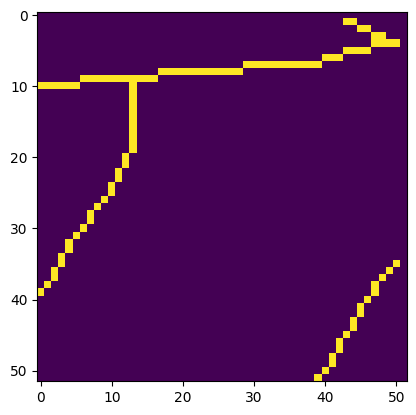

In [121]:
plt.imshow(dataset.imgs[199][0])

In [87]:
import numpy as np

In [145]:
m1 = np.zeros_like(dataset.imgs[199][0]) ##
m1[26:, 26:] = 1                         #1

In [146]:
m2 = np.zeros_like(dataset.imgs[199][0]) ##
m2[26:, :27] = 1                         1#

In [147]:
m3 = np.zeros_like(dataset.imgs[199][0])  #1#
m3[:27:, :27] = 1                         ##

In [148]:
m4 = np.zeros_like(dataset.imgs[199][0]) #1
m4[:27:, 26:] = 1                       ##

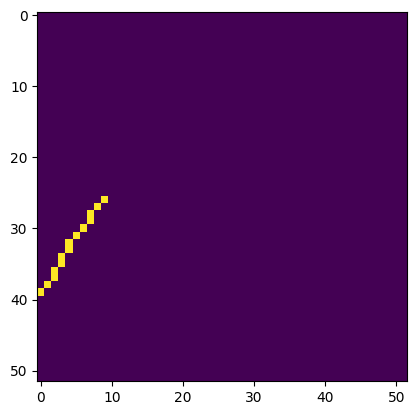

In [143]:
plt.imshow(dataset.imgs[199][0] * m2)

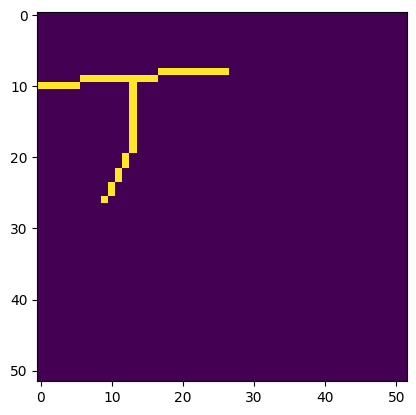

In [144]:
plt.imshow(dataset.imgs[199][0] * m3)

0 - дороги
1 - не использовать 
2 - не использовать 
3 - водоёмы
4 - 
5 - 
6 - 
7 - 
8 - парки, зеленые места
9 - жилые районы
10 - использованные земли
11 - не использовать 

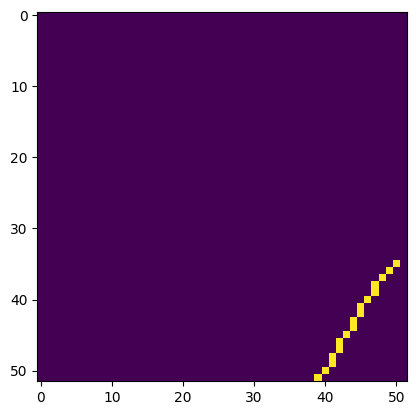

In [149]:
plt.imshow(dataset.imgs[199][0] * m1)

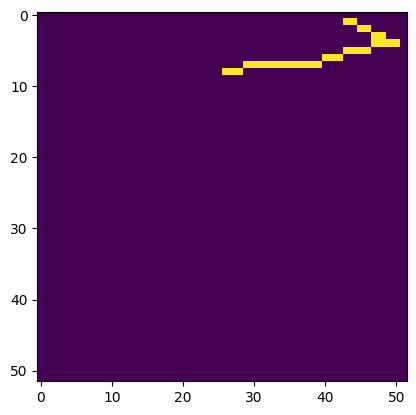

In [150]:
plt.imshow(dataset.imgs[199][0] * m4)

In [151]:
data = {}

In [180]:
for i in range(len(a)):
    data[i] = [(dataset.imgs[i][0] * m1 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][0] * m2 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][0] * m3 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][0] * m4 > 0).sum().item()]

In [181]:
for i in range(len(a)):
    data[i] += [(dataset.imgs[i][1] * m1 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][1] * m2 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][1] * m3 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][1] * m4 > 0).sum().item()]
    
    data[i] += [(dataset.imgs[i][2] * m1 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][2] * m2 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][2] * m3 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][2] * m4 > 0).sum().item()]
    
    data[i] += [(dataset.imgs[i][3] * m1 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][3] * m2 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][3] * m3 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][3] * m4 > 0).sum().item()]
    
    data[i] += [(dataset.imgs[i][4] * m1 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][4] * m2 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][4] * m3 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][4] * m4 > 0).sum().item()]
    
    data[i] += [(dataset.imgs[i][5] * m1 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][5] * m2 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][5] * m3 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][5] * m4 > 0).sum().item()]
    
    data[i] += [(dataset.imgs[i][6] * m1 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][6] * m2 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][6] * m3 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][6] * m4 > 0).sum().item()]
    
    data[i] += [(dataset.imgs[i][7] * m1 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][7] * m2 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][7] * m3 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][7] * m4 > 0).sum().item()]
    
    data[i] += [(dataset.imgs[i][8] * m1 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][8] * m2 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][8] * m3 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][8] * m4 > 0).sum().item()]
    
    data[i] += [(dataset.imgs[i][9] * m1 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][9] * m2 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][9] * m3 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][9] * m4 > 0).sum().item()]
    
    data[i] += [(dataset.imgs[i][10] * m1 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][10] * m2 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][10] * m3 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][10] * m4 > 0).sum().item()]
    
    data[i] += [(dataset.imgs[i][11] * m1 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][11] * m2 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][11] * m3 > 0).sum().item()]
    data[i] += [(dataset.imgs[i][11] * m4 > 0).sum().item()]

In [182]:
for i in range(len(a)):
    data[i] += [(dataset.imgs[i][0] > 0).sum().item()]
    data[i] += [(dataset.imgs[i][1] > 0).sum().item()]
    data[i] += [(dataset.imgs[i][2] > 0).sum().item()]
    data[i] += [(dataset.imgs[i][3] > 0).sum().item()]
    data[i] += [(dataset.imgs[i][4] > 0).sum().item()]
    data[i] += [(dataset.imgs[i][5] > 0).sum().item()]
    data[i] += [(dataset.imgs[i][6] > 0).sum().item()]
    data[i] += [(dataset.imgs[i][7] > 0).sum().item()]
    data[i] += [(dataset.imgs[i][8] > 0).sum().item()]
    data[i] += [(dataset.imgs[i][9] > 0).sum().item()]
    data[i] += [(dataset.imgs[i][10] > 0).sum().item()]
    data[i] += [(dataset.imgs[i][11] > 0).sum().item()]

In [166]:
import pandas as pd

In [186]:


df = pd.DataFrame.from_dict(data, orient="index")

res = df.apply(pd.Series.explode)

In [188]:
res.columns = ['num', 'm10','m20','m3','m40','m11', 'm21', 'm31', 'm41', 'm12','m22','m32','m42','m13','m23','m33','m43','m14','m24','m34','m44','m15','m25','m35', 'm16','m26','m36','m46','m17','m27','m37','m47','m18','m28',
                                              'm38','m48','m19','m29','m39','m49','m110','m210','m310','m410','m111','m211','m311','m411', 'summ0', 'summ1', 'summ2','summ3','summ4','summ5','summ6','summ7','summ8','summ9','summ10','summ11']

In [204]:
res/ (52 * 52)

,num,m10,m20,m3,m40,m11,m21,m31,m41,m12,m22,m32,m42,m13,m23,m33,m43,m14,m24,m34,m44,m15,m25,m35,m16,m26,m36,m46,m17,m27,m37,m47,m18,m28,m38,m48,m19,m29,m39,m49,m110,m210,m310,m410,m111,m211,m311,m411,summ0,summ1,summ2,summ3,summ4,summ5,summ6,summ7,summ8,summ9,summ10,summ11
0,0.004068,0.009246,0.024408,0.013683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005917,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049186,0.093935,0.000000,0.000000,0.000000,0.000000,0.213018,0.245192,0.184911,0.075814,0.0,0.0,0.0,0.0,0.050296,0.0,0.0,0.005917,0.000000,0.000000,0.000000,0.000000,0.138683,0.000000,0.686760,0.0
1,0.000000,0.005178,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.005917,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.102071,0.000000,0.080621,0.199704,0.000000,0.000000,0.000000,0.000000,0.110207,0.232618,0.140163,0.041420,0.0,0.0,0.0,0.0,0.005178,0.0,0.0,0.005917,0.000000,0.000000,0.000000,0.000000,0.368713,0.000000,0.501479,0.0
2,0.008876,0.019970,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001849,0.000000,0.014423,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.007027,0.000000,0.007396,0.004808,0.000000,0.000000,0.000000,0.000000,0.210799,0.197115,0.235577,0.235577,0.0,0.0,0.0,0.0,0.028107,0.0,0.0,0.016272,0.000000,0.000000,0.000000,0.000000,0.019231,0.000000,0.843195,0.0
3,0.012574,0.005917,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.107249,0.018491,0.055104,0.059172,0.000000,0.000000,0.000000,0.000000,0.089127,0.228550,0.193417,0.151627,0.0,0.0,0.0,0.0,0.017751,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.222263,0.000000,0.643491,0.0
4,0.000000,0.006657,0.003698,0.008136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.035133,0.006657,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.173077,0.211538,0.240754,0.209320,0.0,0.0,0.0,0.0,0.017751,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.041790,0.000000,0.800666,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11552,0.000000,0.006287,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.010725,0.110577,0.116494,0.103920,0.217825,0.027367,0.000000,0.032175,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.006287,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.331731,0.266642,0.000000,0.0
11553,0.014423,0.014793,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.013314,0.014423,0.000740,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.014053,0.014423,0.000740,0.000000,0.024408,0.006657,0.015533,0.000000,0.218935,0.235577,0.217825,0.259615,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.028846,0.0,0.0,0.000000,0.027737,0.000000,0.000000,0.028476,0.046598,0.893861,0.000000,0.0
11554,0.016272,0.018861,0.012574,0.005917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000740,0.003328,0.006657,0.011834,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000740,0.003328,0.006657,0.011834,0.158284,0.098003,0.000000,0.000000,0.045118,0.088757,0.228920,0.258506,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.051775,0.0,0.0,0.000000,0.021820,0.000000

In [191]:
res.to_csv('imgs_pr.csv')

In [ ]:
res['m10'].sum()

327642

In [195]:
res['summ0'].max()

686

<Axes: >

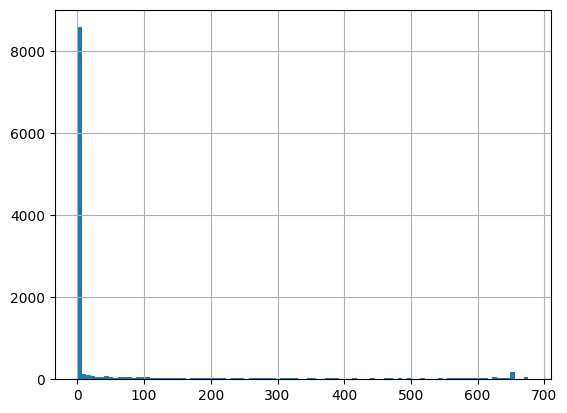

In [201]:
res.m110.hist(bins=100)

In [203]:
torch.FloatTensor(res.values).shape

torch.Size([11557, 60])

In [206]:
dataset.handcrafted_image_features = torch.FloatTensor(res.values) / (52 * 52)

In [207]:
dataset

Data(edge_index=[2, 47736], y=[11557], zone_id=[11557], train_mask=[11557], val_mask=[11557], test_mask=[11557], train_val_mask=[11557], train_fold_0=[11557], val_fold_0=[11557], train_fold_1=[11557], val_fold_1=[11557], train_fold_2=[11557], val_fold_2=[11557], train_fold_3=[11557], val_fold_3=[11557], train_fold_4=[11557], val_fold_4=[11557], x=[11557, 782], imgs=[11557, 12, 52, 52], handcrafted_image_features=[11557, 60])

In [209]:
torch.save(dataset, '/home/jupyter/datasphere/s3/s3-sirius/sirius_2024_participants/twwist/graph_with_cv_full_and_images/graph_with_cv_full_and_images_777_with_image_features.pickle')